## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier




## Load dataset

In [2]:
df = pd.read_csv('/content/1702184567307-WA_FnUseC_TelcoCustomerChurn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Split Dataset

In [4]:
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']

## Train

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    )

In [6]:
print(X_train.shape)
print(X_test.shape)

(5634, 19)
(1409, 19)


## EDA

In [7]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
X.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
X.select_dtypes(include='object').describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


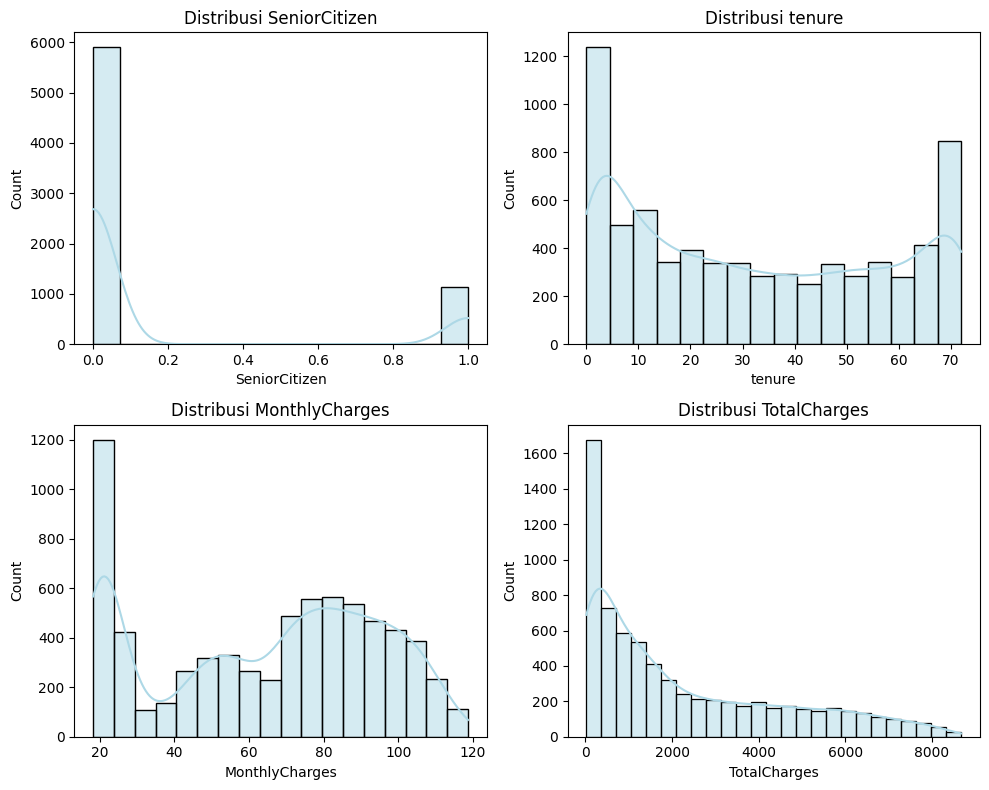

In [11]:
num_col = X.select_dtypes(include='number').columns

n_cols = 2
n_rows = (len(num_col) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(X[col].dropna(), kde=True, color='lightblue', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


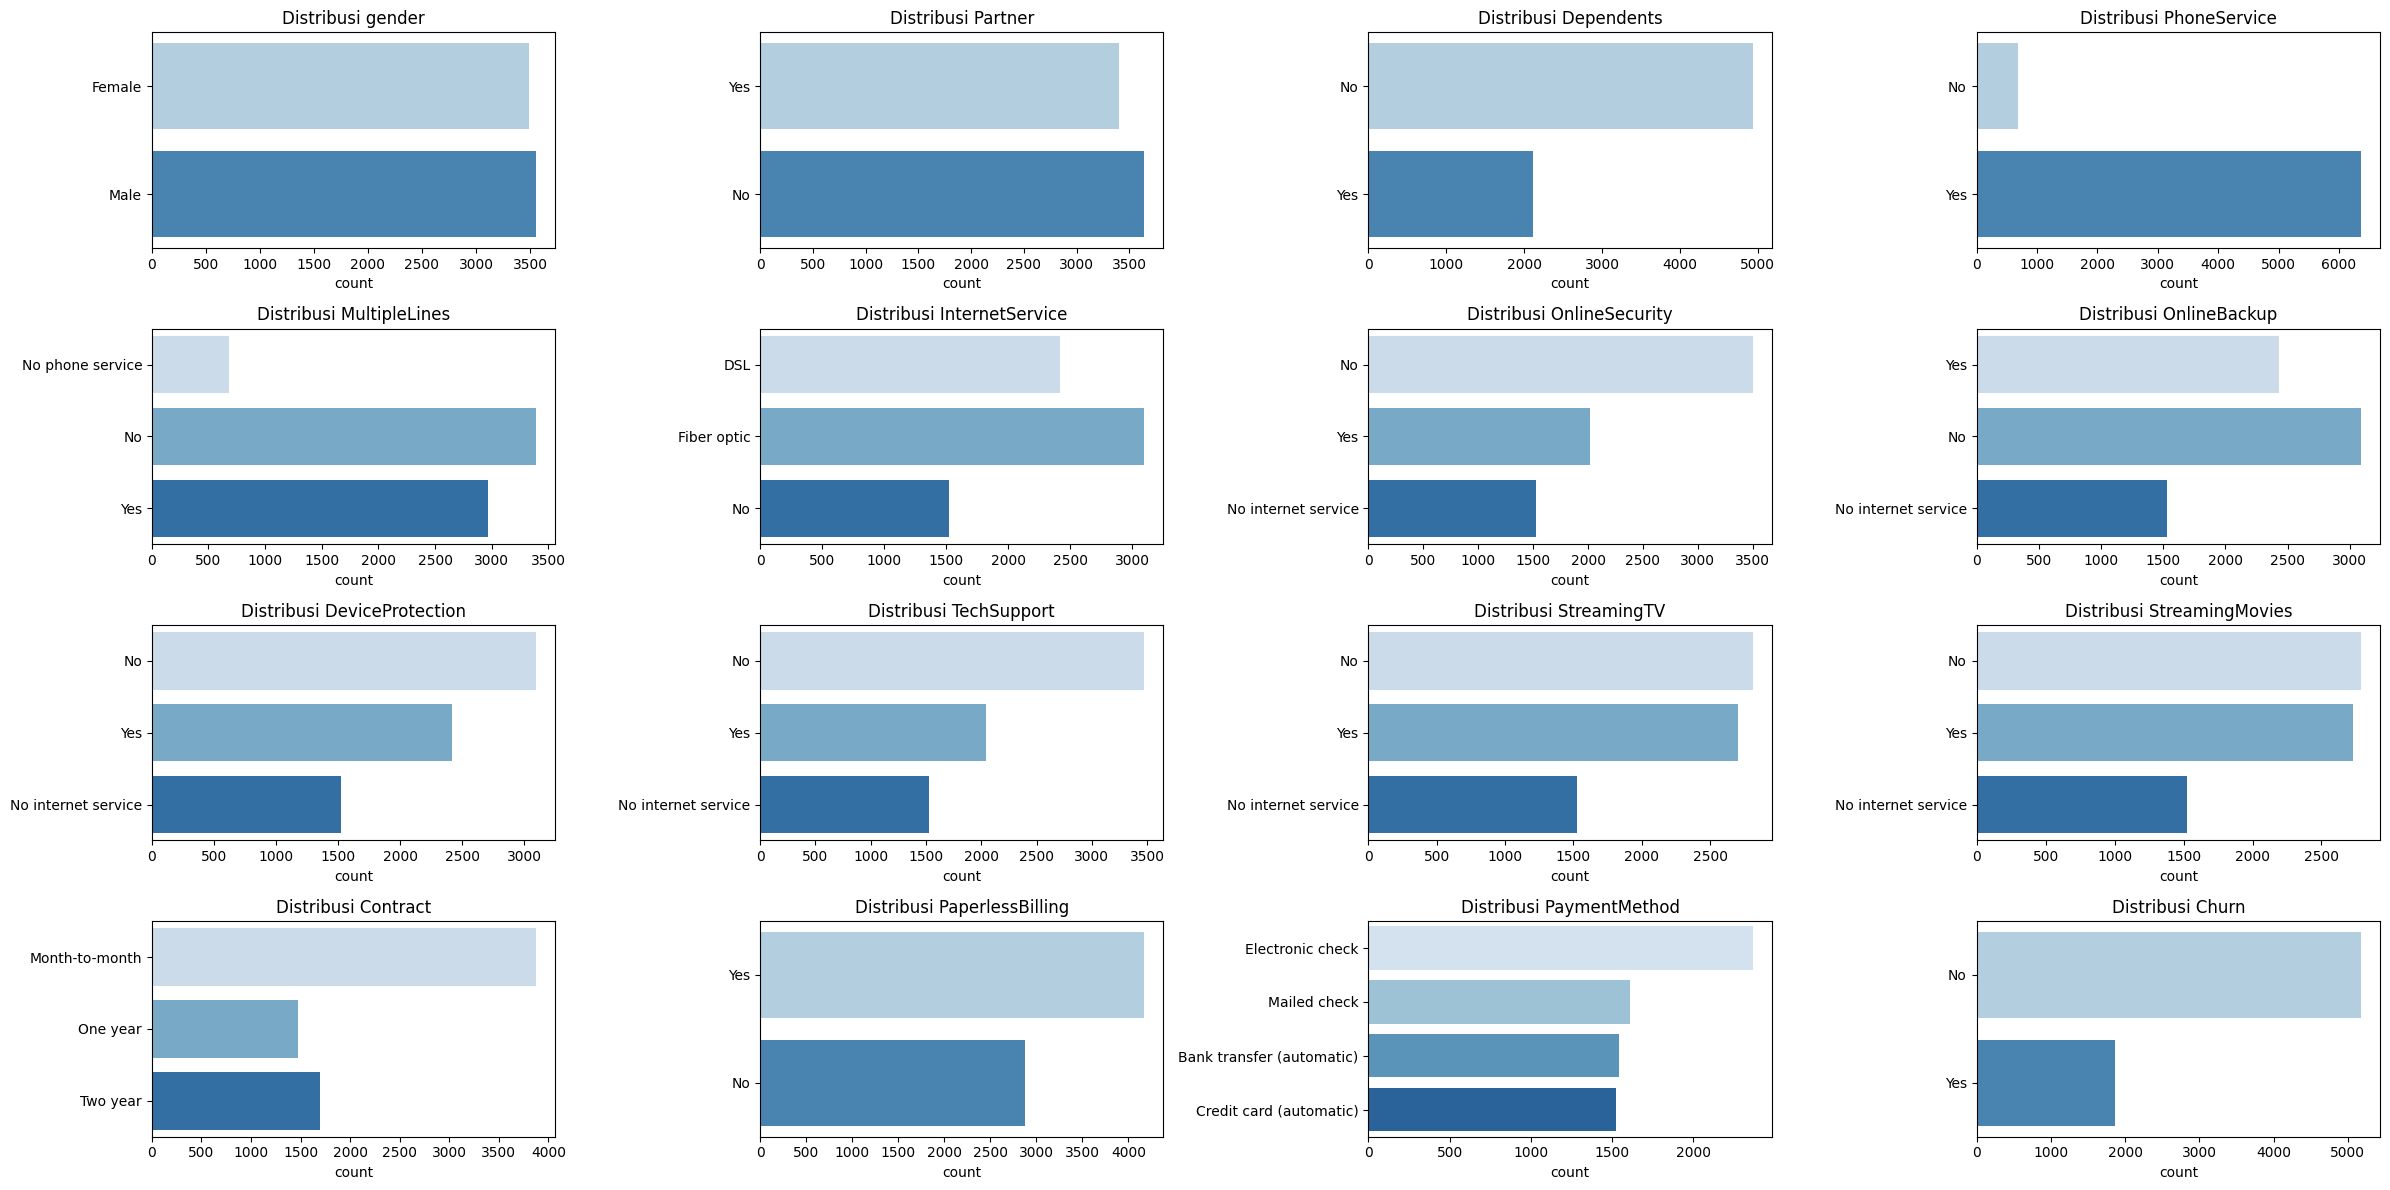

In [12]:
cat_col = X.select_dtypes(include='object').columns

all_cols = list(cat_col) + ['Churn']

n_cols = 4
n_rows = (len(all_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(all_cols):
    data = y if col == 'Churn' else X[col]
    sns.countplot(y=data, palette='Blues', ax=axes[i])

    axes[i].set_ylabel(None)
    axes[i].set_title(f'Distribusi {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#Analisis
* Kolom numerik pada dataset tidak menunjukkan distribusi normal. Sebagian besar fitur numerik, seperti tenure, MonthlyCharges, dan TotalCharges, memiliki distribusi yang skewed ke kanan (right-skewed). Hal ini menandakan bahwa mayoritas nilai berada pada rentang rendah, sementara terdapat sejumlah kecil nilai yang sangat tinggi.

* Kolom kategorikal pada dataset memiliki jumlah nilai unik yang relatif sedikit, karena sebagian besar fitur bersifat biner (Yes dan No). Pada fitur-fitur tersebut, mayoritas nilai adalah No, kecuali pada kolom PhoneService dan PaperlessBilling yang didominasi oleh nilai Yes.

* Selain itu, pada kolom kategorikal non-biner (seperti Contract, PaymentMethod, dan InternetService), terdapat ketimpangan distribusi kategori, di mana satu kategori mendominasi jumlah observasi, sedangkan kategori lainnya memiliki proporsi yang jauh lebih kecil dan relatif seimbang satu sama lain.

### Data Preprocessing

In [13]:
import numpy as np

num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_col:
    X[col] = np.log1p(X[col])



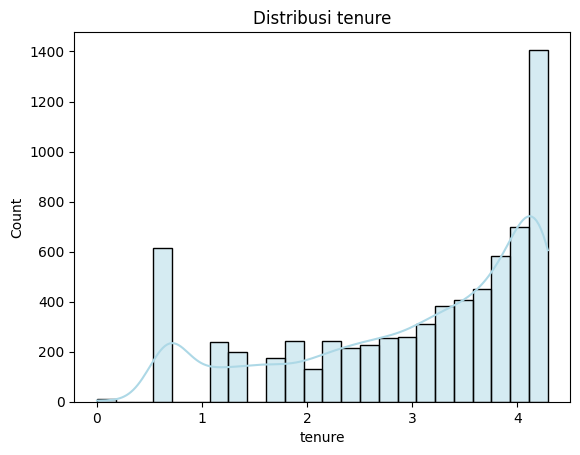

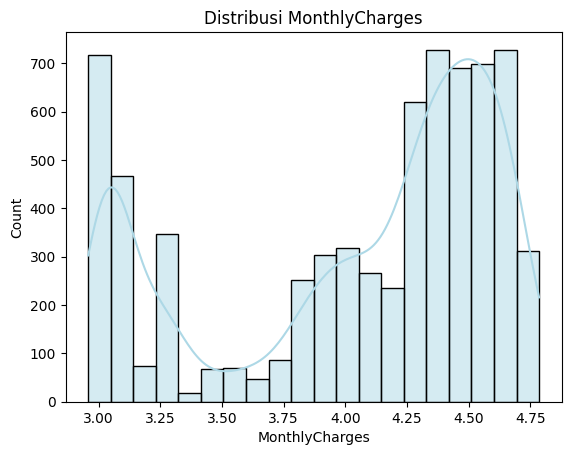

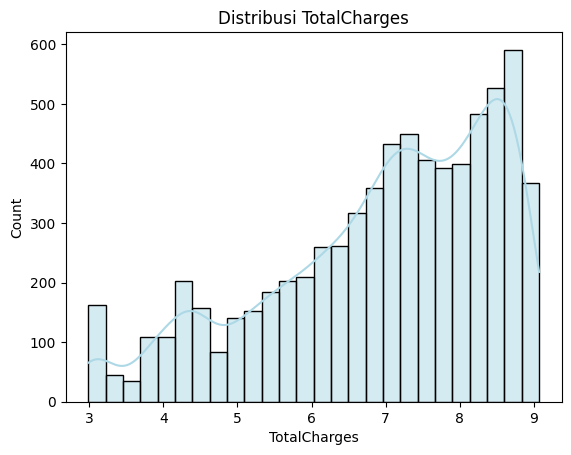

In [14]:
for col in num_col:
  sns.histplot(X[col], kde=True, color='lightblue')
  plt.title(f'Distribusi {col}')

  plt.show()

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ]
)


In [16]:
X_train = X_train.replace(r'^\s*$', np.nan, regex=True)
X_test  = X_test.replace(r'^\s*$', np.nan, regex=True)

In [17]:
for col in num_col:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col]  = pd.to_numeric(X_test[col], errors='coerce')

    median = X_train[col].median()
    X_train[col] = X_train[col].fillna(median)
    X_test[col]  = X_test[col].fillna(median)

In [18]:
X_train_processed = preprocessor.fit_transform(X_train)


In [19]:
y_train_processed = y_train.map({'No': 0, 'Yes': 1})


### Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

In [20]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    random_state=42
)

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=1.5,
    random_state=42,
    eval_metric='logloss'
)
lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
dt = DecisionTreeClassifier(
    max_depth=4,
    class_weight='balanced',
    random_state=42
)



In [21]:
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [22]:
scoring_metrics = ['roc_auc', 'recall', 'f1']


In [23]:
cv_results_rf_train = cross_validate(
    rf,
    X_train_processed,
    y_train_processed,
    cv=skf,
    scoring=scoring_metrics
)

cv_results_xgb_train = cross_validate(
    xgb,
    X_train_processed,
    y_train_processed,
    cv=skf,
    scoring=scoring_metrics
)

cv_results_lr_train = cross_validate(
    lr,
    X_train_processed,
    y_train_processed,
    cv=skf,
    scoring=scoring_metrics
)


cv_results_dt_train = cross_validate(
    dt,
    X_train_processed,
    y_train_processed,
    cv=skf,
    scoring=scoring_metrics
)


In [24]:
results_train = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'ROC-AUC': [
        cv_results_lr_train['test_roc_auc'].mean(),
        cv_results_dt_train['test_roc_auc'].mean(),
        cv_results_rf_train['test_roc_auc'].mean(),
        cv_results_xgb_train['test_roc_auc'].mean()
    ],
    'Recall': [
        cv_results_lr_train['test_recall'].mean(),
        cv_results_dt_train['test_recall'].mean(),
        cv_results_rf_train['test_recall'].mean(),
        cv_results_xgb_train['test_recall'].mean()
    ],
    'F1': [
        cv_results_lr_train['test_f1'].mean(),
        cv_results_dt_train['test_f1'].mean(),
        cv_results_rf_train['test_f1'].mean(),
        cv_results_xgb_train['test_f1'].mean()
    ]
})

results_train

,Model,ROC-AUC,Recall,F1
0,Logistic Regression,0.845920,0.802007,0.629596
1,Decision Tree,0.828042,0.791973,0.602991
2,Random Forest,0.842377,0.386622,0.498224
3,XGBoost,0.847162,0.638796,0.625292


Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

### Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

#Analisa hasil Train
* ROC-AUC hampir sama semua, tapi paling tinggi adalah XGBoost, Logistic Regression, dan Random Forest. Model-model ini mampu membedakan kelas positif dan negatif dengan baik.

* Recall tertinggi adalah Logistic Regression dan Decision Tree. Model-model ini paling efektif dalam mendeteksi semua kasus positif.

* F1-score tertinggi adalah Logistic Regression dan XGBoost, yang menunjukkan model-model ini terbaik dalam menyeimbangkan Recall dan Precision.

* **Kesimpulan**: Logistic Regression merupakan model terbaik karena hampir semua metrik yang digunakan memiliki nilai tertinggi, sehingga performanya paling seimbang dan optimal.

## Test

### Data Preprocessing

In [25]:
X_test_processed = preprocessor.transform(X_test)
y_test_processed = y_test.map({'No': 0, 'Yes': 1})


In [26]:
cv_results_rf_test = cross_validate(
    rf,
    X_test_processed,
    y_test_processed,
    cv=skf,
    scoring=scoring_metrics
)

cv_results_xgb_test = cross_validate(
    xgb,
    X_test_processed,
    y_test_processed,
    cv=skf,
    scoring=scoring_metrics
)

cv_results_lr_test = cross_validate(
    lr,
    X_test_processed,
    y_test_processed,
    cv=skf,
    scoring=scoring_metrics
)


cv_results_dt_test = cross_validate(
    dt,
    X_test_processed,
    y_test_processed,
    cv=skf,
    scoring=scoring_metrics
)


In [27]:
results_test = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'ROC-AUC': [
        cv_results_lr_test['test_roc_auc'].mean(),
        cv_results_dt_test['test_roc_auc'].mean(),
        cv_results_rf_test['test_roc_auc'].mean(),
        cv_results_xgb_test['test_roc_auc'].mean()
    ],
    'Recall': [
        cv_results_lr_test['test_recall'].mean(),
        cv_results_dt_test['test_recall'].mean(),
        cv_results_rf_test['test_recall'].mean(),
        cv_results_xgb_test['test_recall'].mean()
    ],
    'F1': [
        cv_results_lr_test['test_f1'].mean(),
        cv_results_dt_test['test_f1'].mean(),
        cv_results_rf_test['test_f1'].mean(),
        cv_results_xgb_test['test_f1'].mean()
    ]
})

results_test

,Model,ROC-AUC,Recall,F1
0,Logistic Regression,0.830652,0.778198,0.603232
1,Decision Tree,0.795937,0.759423,0.609334
2,Random Forest,0.832232,0.355568,0.461426
3,XGBoost,0.825920,0.580216,0.573051


### Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

#Analisa hasil test
* ROC-AUC paling tinggi adalah Logistic Regression, dan Random Forest.

* Recall tertinggi adalah Logistic Regression dan Random Forest memiliki recall score sangat kecil

* F1-score tertinggi adalah Logistic Regression dan Decision Tree.

* **Kesimpulan**: Logistic Regression tetap menjadi model terbaik karena memiliki skor tertinggi di ketiga metrik yang digunakan.

### Potential impact

Simulasikan potential impact

In [31]:
lr.fit(X_train_processed, y_train_processed)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [33]:
# Probabilitas churn untuk setiap customer di test set
y_prob = lr.predict_proba(X_test_processed)[:, 1]

# Tambahkan ke DataFrame untuk simulasi
simulation_df = X_test.copy()
simulation_df['prob_churn'] = y_prob
simulation_df['pred_churn'] = (y_prob >= 0.5).astype(int)


In [34]:
def segment_risk(prob):
    if prob >= 0.7:
        return 'High Risk'
    elif prob >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

simulation_df['risk_segment'] = simulation_df['prob_churn'].apply(segment_risk)


In [37]:
impact_dict = {
    'High Risk': 0.15,   # estimasi churn dicegah 15%
    'Medium Risk': 0.08, # 8%
    'Low Risk': 0.02     # 2%
}

simulation_df['intervention_effect'] = simulation_df['risk_segment'].map(impact_dict)
simulation_df['churn_avoided'] = simulation_df['prob_churn'] * simulation_df['intervention_effect']

total_churn_avoided = simulation_df['churn_avoided'].sum()
print(f"Estimated customers saved from churn: {int(total_churn_avoided)}")


Estimated customers saved from churn: 61
